# REFERENCES:
    https://towardsdatascience.com/youtube-views-predictor-9ec573090acb
    https://github.com/allenwang28/YouTube-Virality-Predictor/blob/master/notebooks/Data%20Exploration%20-%20Time%20Based.ipynb:     blocks 30,34,35,36,37,40,41,42,43

In [1]:
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

% matplotlib inline

In [2]:
#Read excel
df = pd.read_excel('D:/knowledge/college docs/DSP/Project2/FinalVideoListCommentPrevInfo_1.xlsx')

In [3]:
df.describe()

,CategoryID,CHViewCount,CHSubscriberCount,CHAge,CHVideoCount,Duration,ViewCount,LikeCount,DislikeCount,FavouriteCount,...,Comm_count_ng2,Comm_count_n2,Comm_count_p7,Comm_count_ng7,Comm_count_n7,PView,PLike,PComments,PDislike,PFavorite
count,3405.000000,3.405000e+03,3.405000e+03,3405.000000,3405.000000,3405.000000,3.405000e+03,3405.000000,3405.000000,3405.0,...,3405.000000,3405.000000,3405.000000,3405.000000,3405.000000,3.405000e+03,3405.000000,3405.000000,3405.000000,3405.0
mean,22.780029,1.209259e+08,7.275229e+05,506.190015,253.250514,540.780617,2.320542e+05,4178.070485,187.382673,0.0,...,0.330690,0.942731,2.746843,0.470778,1.343906,2.307779e+05,4132.976211,473.560940,184.938620,0.0
std,4.533666,2.362366e+08,1.425873e+06,742.769687,167.003373,1277.610758,9.966875e+05,14244.568294,877.599342,0.0,...,0.893843,1.826962,3.929377,1.103933,2.296109,9.967308e+05,14233.156770,1851.352609,876.333031,0.0
min,1.000000,3.386900e+04,0.000000e+00,16.000000,16.000000,7.000000,0.000000e+00,0.000000,0.000000,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.0
25%,22.000000,2.565808e+06,1.483800e+04,134.000000,118.000000,216.000000,1.932000e+03,29.000000,1.000000,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,1.604000e+03,27.000000,4.000000,1.000000,0.0
50%,24.000000,1.536434e+07,5.994500e+04,265.000000,216.000000,387.000000,1.383400e+04,197.000000,12.000000,0.0,...,0.000000,0.000000,1.000000,0.000000,0.000000,1.301000e+04,184.000000,35.000000,11.000000,0.0
75%,26.000000,1.469566e+08,8.863590e+05,513.000000,345.000000,651.000000,1.119210e+05,2447.000000,85.000000,0.0,...,0.000000,1.000000,4.000000,0.000000,2.000000,1.105130e+05,2360.000000,233.000000,82.000000,0.0
max,29.000000,1.277878e+09,7.034479e+06,5101.000000,629.000000,40819.000000,3.404457e+07,239376.000000,30144.000000,0.0,...,10.000000,13.000000,20.000000,11.000000,13.000000,3.404457e+07,239376.000000,36166.000000,30144.000000,0.0


In [4]:
uniqueCategoryID = list(set(df['CategoryID'].tolist()))

In [5]:
uniqueCategoryID

[1, 2, 10, 17, 19, 22, 23, 24, 25, 26, 27, 28, 29]

# Feature Engineering and Removing potential Outliers

In [6]:
from datetime import datetime
from dateutil.parser import parse

def convert_to_days(dt):
    d=parse(dt)
    a=d.strftime('%m/%d/%Y')
    x=datetime.strptime(a, '%m/%d/%Y').date()
    y=datetime.now().date()
    days=((y-x).days)
    return days

In [7]:
AgeVideo = []
for i in df['PublishedDate']:
    AgeVideo.append(convert_to_days(str(i)))
    
df['AgeVideo'] = AgeVideo

In [8]:
df['AgeVideo'][df['AgeVideo']<700].count()

3058

In [9]:
df['AgeVideo'][df['AgeVideo']>30].count()

2786

In [10]:
df = df[df['AgeVideo']>30]

In [11]:
df = df[df['AgeVideo']<700]

In [12]:
df.shape

(2439, 33)

In [13]:
df['ViewCount'][df['ViewCount']>100000].count()

692

In [14]:
df = df[df['ViewCount']<100000]

In [15]:
df.shape

(1747, 33)

In [16]:
df['ViewCount'][df['ViewCount']==0].count()

0

In [17]:
df = df[df['ViewCount']!=0]

In [18]:
df["Like/View"]=df['LikeCount'] / df['ViewCount'].astype(np.float)*100

In [19]:
df["Like/View"]

0     1.842351
1     2.821012
2     2.840761
3     7.848444
4     5.876951
5     4.654443
6     2.841391
7     1.800847
8     2.011173
9     2.834908
10    1.494963
11    1.507301
0     2.492560
1     1.926101
2     2.176221
3     1.951220
4     1.902950
5     1.715955
6     1.774194
7     3.131991
8     4.189944
9     2.279874
10    3.111495
11    2.323126
12    3.052065
13    3.247373
14    2.328431
15    1.551189
16    2.821317
17    2.973978
        ...   
33    2.784396
35    3.293713
36    3.826261
37    2.467415
38    3.857774
39    3.573563
41    3.810725
42    3.161703
43    3.161703
44    3.161703
45    3.161703
46    3.161703
47    3.161703
48    3.161703
49    3.161703
50    3.161703
51    3.161703
52    3.161703
53    3.161703
54    3.161703
55    3.161703
56    3.161703
57    3.161703
58    3.161703
59    2.959281
60    2.275305
61    3.990833
62    3.434431
63    4.178505
64    3.572845
Name: Like/View, Length: 1747, dtype: float64

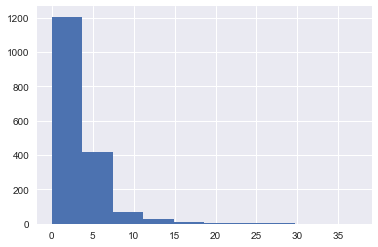

In [20]:
df["Like/View"].hist()
plt.show()

In [21]:
df['Like/View'][df['Like/View']==0].count()

80

In [22]:
df = df[df['Like/View']>0]

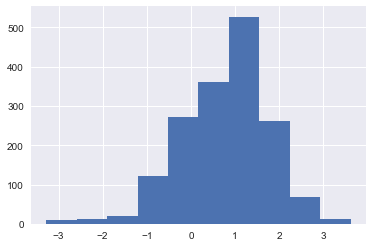

In [23]:
df['Like/View'].apply(np.log).hist()

In [24]:
df['Like/View']=df['Like/View'].apply(np.log)

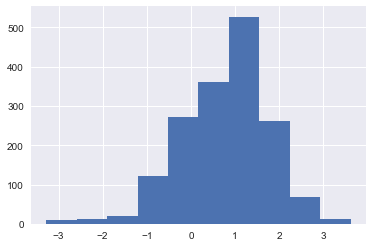

In [25]:
df['Like/View'].hist()

# Models

# 1. GradientBoostingRegressor

Features include count of sentiment after 2 days of video being published

In [26]:
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import train_test_split
from sklearn.utils import shuffle
from sklearn.metrics import mean_squared_error
#from sklearn.preprocessing import MinMaxScaler

In [27]:
gbrcolumns = ['CHSubscriberCount', 'CHVideoCount', 'CHViewCount','CHAge','PComments', 'PLike','Duration',
            'Comm_count_p2','AgeVideo']
X_dfgrb = df[gbrcolumns]
y_dfgrb = df['Like/View']

In [28]:
X_train, X_test, y_train, y_test = train_test_split(X_dfgrb, y_dfgrb, test_size=0.3)

params = {'n_estimators': 1000, 'max_depth': 4, 'min_samples_split': 2,
          'learning_rate': 0.01, 'loss': 'ls','random_state':42 }
grbreg = GradientBoostingRegressor(**params)
grbreg.fit(X_train, y_train)
#print("R^2: {0}").format(reg.score(X_test, y_test))

GradientBoostingRegressor(alpha=0.9, criterion='friedman_mse', init=None,
             learning_rate=0.01, loss='ls', max_depth=4, max_features=None,
             max_leaf_nodes=None, min_impurity_split=1e-07,
             min_samples_leaf=1, min_samples_split=2,
             min_weight_fraction_leaf=0.0, n_estimators=1000,
             presort='auto', random_state=42, subsample=1.0, verbose=0,
             warm_start=False)

In [29]:
grbreg.score(X_test, y_test)

0.74603607875623834

In [30]:
mse = mean_squared_error(y_test, grbreg.predict(X_test))
print("MSE: %.4f" % mse)

MSE: 0.2294


Features include count of sentiment after 7 days of video being published

In [31]:
gbrcolumns7 = ['CHSubscriberCount', 'CHVideoCount', 'CHViewCount','CHAge','PComments', 'PDislike', 'PLike', 'PView','Duration',
            'Comm_count_p7','AgeVideo']
X_dfgrb7 = df[gbrcolumns7]
y_dfgrb7 = df['Like/View']

In [32]:
X_train, X_test, y_train, y_test = train_test_split(X_dfgrb7, y_dfgrb7, test_size=0.3)
params = {'n_estimators': 1000, 'max_depth': 4, 'min_samples_split': 2,
          'learning_rate': 0.01, 'loss': 'ls','random_state':42 }    
grb7reg = GradientBoostingRegressor(**params)
grb7reg.fit(X_train, y_train)
#print("R^2: {0}").format(reg.score(X_test, y_test))

GradientBoostingRegressor(alpha=0.9, criterion='friedman_mse', init=None,
             learning_rate=0.01, loss='ls', max_depth=4, max_features=None,
             max_leaf_nodes=None, min_impurity_split=1e-07,
             min_samples_leaf=1, min_samples_split=2,
             min_weight_fraction_leaf=0.0, n_estimators=1000,
             presort='auto', random_state=42, subsample=1.0, verbose=0,
             warm_start=False)

In [33]:
grb7reg.score(X_test, y_test)

0.8131519657776789

In [34]:
mse = mean_squared_error(y_test, grb7reg.predict(X_test))
print("MSE: %.4f" % mse)

MSE: 0.2058


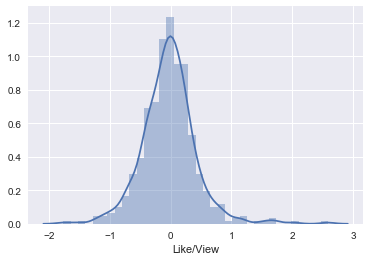

In [35]:
y_predgrb = grb7reg.predict(X_test)
residuals = y_predgrb - y_test

sns.distplot(residuals)

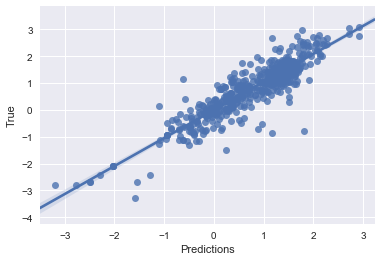

In [36]:
plot_df = pd.DataFrame(y_predgrb, columns=['Predictions'])
plot_df['True'] = np.array(y_test)
sns.regplot(x='Predictions', y='True', data=plot_df)

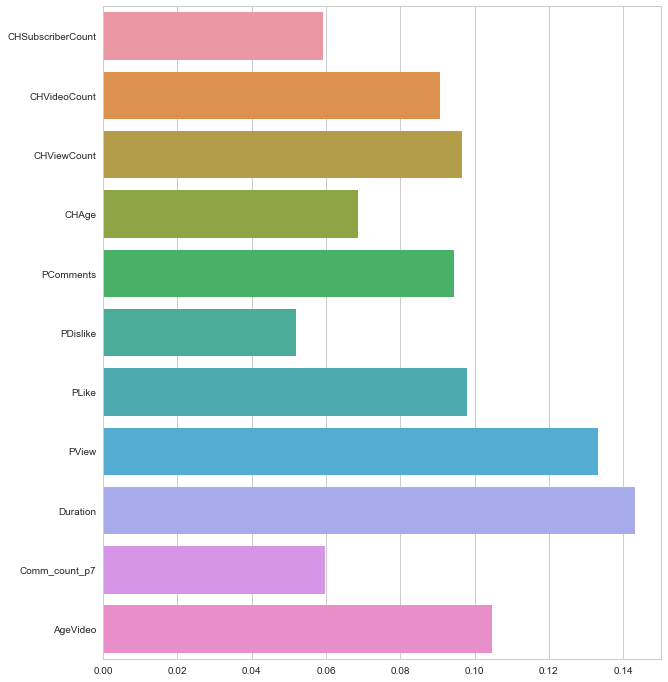

In [37]:
sns.set_style('whitegrid')
plt.figure(figsize=(10,12))
sns.barplot(x=grb7reg.feature_importances_, y=gbrcolumns7)

# XGBRegressor Model

In [38]:
from xgboost import XGBRegressor

C:\Users\AdrianFcBarcelona\Anaconda3\lib\site-packages\sklearn\cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [39]:
xgb = XGBRegressor()

xgb.fit(X_train, y_train)
xgb.score(X_test, y_test)

0.8037505758566974

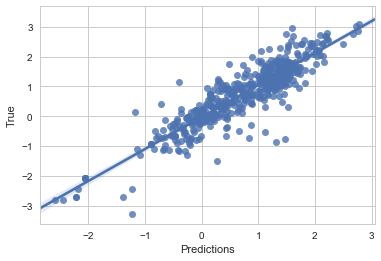

In [40]:
y_pred = xgb.predict(X_test)
plot_df = pd.DataFrame(y_pred, columns=['Predictions'])
plot_df['True'] = np.array(y_test)
sns.regplot(x='Predictions', y='True', data=plot_df)

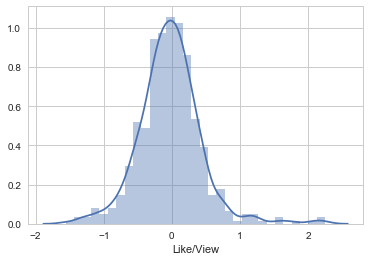

In [41]:
residuals = y_pred - y_test

sns.distplot(residuals)

In [42]:
mse = mean_squared_error(y_test, xgb.predict(X_test))
print("MSE: %.4f" % mse)

MSE: 0.2162


In [43]:
from sklearn.model_selection import cross_val_score
cv1 = cross_val_score(GradientBoostingRegressor(), X_dfgrb, y_dfgrb, scoring='neg_mean_squared_error')
cv1 = np.sqrt(-cv1)
print("{0} +- {1}".format(cv1.mean(), cv1.var()))

0.9225043881826668 +- 0.018171298164885594
